<a href="https://colab.research.google.com/github/Alex-Ukraine/tf2-fcc/blob/master/eleventh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import gym

In [53]:
env = gym.make('FrozenLake-v0')

In [54]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [55]:
state = env.reset()

In [56]:
action = env.action_space.sample()

In [57]:
new_state, reward, done, info = env.step(action)

In [58]:
env.render()

  (Left)
SFFF
FHFH
FFFH
HFFG


In [59]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [60]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [61]:
EPISODES = 2000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

In [62]:
epsilon = 0.9

if np.random.uniform(0, 1) < epsilon:
    action = env.action_space.sample()
else:
    action = np.argmax(Q[state, :])

In [63]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

In [64]:
import gym
import numpy as np
import time
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500
MAX_STEPS - 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False
epsilon = 0.9

In [65]:
rewards = []
for episode in range(EPISODES):

    state = env.reset()
    for _ in range(MAX_STEPS):

        if RENDER:
            env.render()

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state
        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

[[1.62127423e-01 8.75488676e-03 9.52253535e-03 8.96226342e-03]
 [4.82010012e-03 2.93165583e-04 2.96395263e-03 2.52348200e-01]
 [5.26100852e-03 1.84975331e-03 3.98398027e-03 1.29173209e-01]
 [1.45417383e-03 1.65410257e-03 1.67773291e-03 1.00434645e-01]
 [1.72011258e-01 2.87307771e-03 2.41576981e-03 8.21735508e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.95232248e-05 2.18532792e-05 5.16070486e-03 6.11394199e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.16142137e-03 4.94497380e-03 1.02369780e-02 2.33779514e-01]
 [5.24627104e-03 6.63231923e-01 5.23280028e-03 5.58711947e-03]
 [1.66229468e-01 3.98967796e-03 1.95372626e-03 3.97313428e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.97751542e-02 7.15912999e-02 3.50790695e-01 7.16020913e-02]
 [2.07619511e-01 3.42960437e-01 2.10764296e-01 1.62974695e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

Text(0.5, 0, "episodes (100's)")

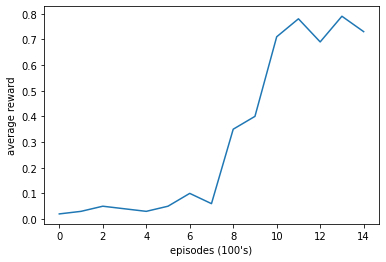

In [67]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')